## I. Introduction

* The wine dataset contains 13 dependent variables ('Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline') and the independent variable is the class label, which is the type of wine (class 1, 2, 3). Since the data is mutivariable, we will use prinicipal component analysis to reduce dimension-often into 2 components. In theory, the variables are arranged in from most to least explained variance. In addition, we will visualize if the wine classes are separated properly by PCA using 3 different kernels: linear, sigmoid, and rbf. 

## II. Data Preprocessing

* For preprocessing, we would perform feature scaling on the 13 dependent variables. 

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
 
wine_dataset = pd.read_csv('wine_dataset.csv')
wine_dataset.columns = ['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wine_dataset.head()


,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [77]:
X = wine_dataset.iloc[:, 0:13].values #dependent variables
sc = StandardScaler() #perform standard scaling
x = sc.fit_transform(X)

## III. Prinicipal Component Analysis (PCA)

### A. Linear Kernel

In [78]:
pca = PCA(n_components = 2)
pca_model = pca.fit_transform(x)
pca_model = pd.DataFrame(data = pca_model , columns = ['pc1', 'pc2'])
pca_model.head()

,pc1,pc2
0,-2.379345,-0.486518
1,-2.469807,1.152548
2,-3.254438,2.726935
3,-1.414881,1.348923
4,-2.657918,1.864433


In [79]:
pca_model = pd.concat([pca_model, wine_dataset[['target']]], axis = 1) #combine ground truth and pc1 and pc2
pca_model.head()

,pc1,pc2,target
0,-2.379345,-0.486518,1
1,-2.469807,1.152548,1
2,-3.254438,2.726935,1
3,-1.414881,1.348923,1
4,-2.657918,1.864433,1


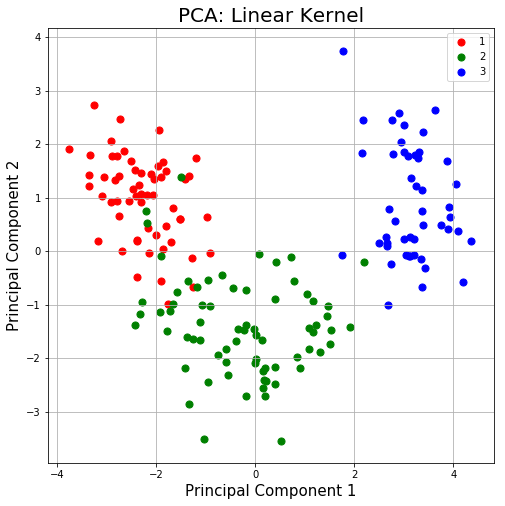

In [80]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA: Linear Kernel', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_model['target'] == target
    ax.scatter(pca_model.loc[indicesToKeep, 'pc1']
               , pca_model.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### B. Sigmoid

In [81]:
pca =  KernelPCA(n_components = 2, kernel="sigmoid")
pca_model = pca.fit_transform(x)
pca_model = pd.DataFrame(data = pca_model , columns = ['pc1', 'pc2'])
pca_model.head()

,pc1,pc2
0,-0.454397,0.257222
1,-0.465341,-0.214268
2,-0.599944,-0.436006
3,-0.235828,-0.335235
4,-0.471785,-0.257474


In [82]:
pca_model = pd.concat([pca_model, wine_dataset[['target']]], axis = 1) #combine ground truth and pc1 and pc2
pca_model.head()

,pc1,pc2,target
0,-0.454397,0.257222,1
1,-0.465341,-0.214268,1
2,-0.599944,-0.436006,1
3,-0.235828,-0.335235,1
4,-0.471785,-0.257474,1


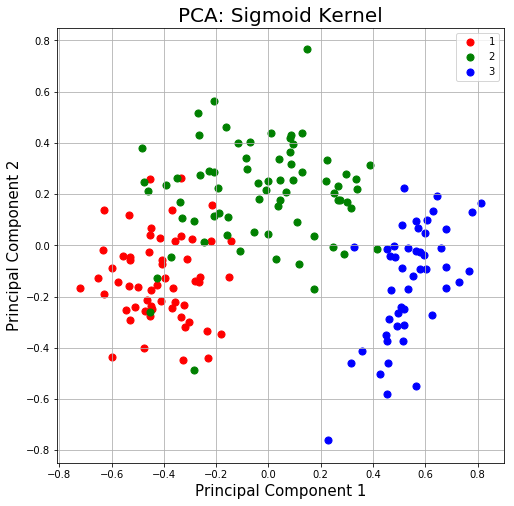

In [83]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA: Sigmoid Kernel', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_model['target'] == target
    ax.scatter(pca_model.loc[indicesToKeep, 'pc1']
               , pca_model.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### C. RBF Kernel

In [84]:
pca =  KernelPCA(n_components = 2, kernel="rbf")
pca_model = pca.fit_transform(x)
pca_model = pd.DataFrame(data = pca_model , columns = ['pc1', 'pc2'])
pca_model.head()

,pc1,pc2
0,0.363284,-0.031936
1,0.437887,-0.204161
2,0.408947,-0.403009
3,0.308967,-0.165385
4,0.537286,-0.417603


In [85]:
pca_model = pd.concat([pca_model, wine_dataset[['target']]], axis = 1) #combine ground truth and pc1 and pc2
pca_model.head()

,pc1,pc2,target
0,0.363284,-0.031936,1
1,0.437887,-0.204161,1
2,0.408947,-0.403009,1
3,0.308967,-0.165385,1
4,0.537286,-0.417603,1


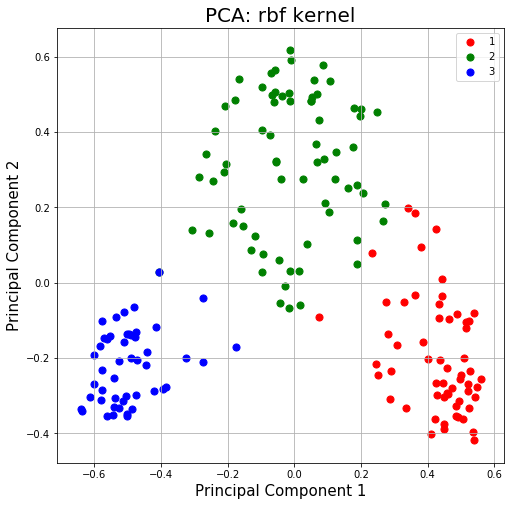

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA: rbf kernel', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_model['target'] == target
    ax.scatter(pca_model.loc[indicesToKeep, 'pc1']
               , pca_model.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### IV. Conclusion

* Overall, for all kernels used in this exercise (linear, sigmoid, and rbf), the wine class are separated properly into defined clusters. 